# Hash Functions and Multiplanes

- Lookup using hash functions is the calculation of the hash key or bucket id
- This id is assigned for a given entry
    - Basic Hash Tables
    - Multiplanes
    - Random Planes

In [1]:
import numpy as np
import pprint
from utils import plot_vectors
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4)

- A hash function for integer numbers
- Input: List of integers and No of Buckets
- Output: Hash table stored as a dict
- Keys: Hash Keys and Values: Hashed element input list
- The hash function is just the remainder of the integer division between each element and the desired number of buckets.

In [2]:
def basic_hash_table(value_1, n_buckets):
    
    def hash_function(value, n_buckets):
        return int(value) % n_buckets
    
    hash_table = {i:[] for i in range(n_buckets)}
    
    for value in value_1:
        hash_value = hash_function(value, n_buckets)
        hash_table[hash_value].append(value)
        
    return hash_table

In [3]:
value_l = [100, 10, 14, 17, 97] # Set of values to hash
hash_table_example = basic_hash_table(value_l, n_buckets=10)
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


### Planes
- Multiplanes hash functions are other types of hash functions
- They are based on the idea of numbering every single region that is formed by the intersection of n planes

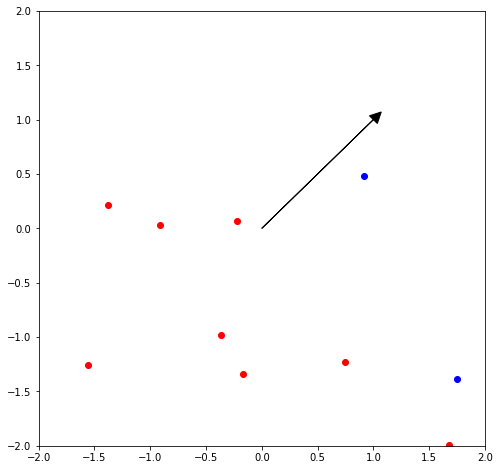

In [4]:
P = np.array([[1, 1]])
fig, ax1 = plt.subplots(figsize=(8, 8))

plot_vectors([P], axes=[2, 2], ax=ax1)

for i in range(0, 10):
    v1 = np.array(np.random.uniform(-2, 2, 2)) # Get a pair of random numbers between -4 and 4
    side_of_plane = np.sign(np.dot(P, v1.T))
    
    # Color the points depending on the sign of the result of np.dot(P, point.T)
    if(side_of_plane == 1):
        ax1.plot([v1[0]], [v1[1]], 'bo') # Plot blue points
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro')
        
plt.show()

- The vector that defines the plane does not mark the boundary between 2 sides of the plane(red, blue)
- It markes the direction in which the positive side of the plane - Not quite intuitive


- To plot the separation plane, Plot a perpendicular line to the vector P
- A $90^o$ degree rotation matrix achieves the line

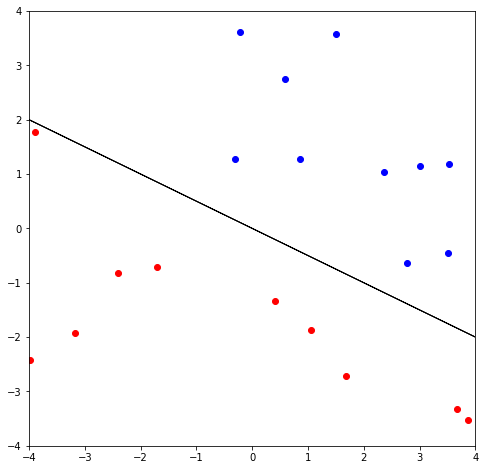

In [5]:
P = np.array([[1, 2]]) # Define a single plane, can change the direction

# Get a new plane perpendicular to P. We use a rotation matrix
PT = np.dot([
    [0, 1], [-1, 0]
], P.T).T

fig, ax1 = plt.subplots(figsize=(8, 8)) # Create a plot with custom size

plot_vectors([PT * 4, PT * -4], colors=['k', 'k'], axes=[4, 4], ax=ax1)

# Plot random 20 points
for i in range(0, 20):
    v1 = np.array(np.random.uniform(-4, 4, 2)) # Get a pair of random numbers between -4 and 4
    side_of_plane = np.sign(np.dot(P, v1.T)) # Get the sign of the dot product with P

    # Color the points depending on the sign of the result of np.dot(P, point.T)
    if(side_of_plane == 1):
        ax1.plot([v1[0]], [v1[1]], 'bo') # Plot blue points
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro')
plt.show()

In [6]:
P = np.array([[1, 1]])      # Single plane
v1 = np.array([[1, 2]])     # Sample point 1
v2 = np.array([[-1, 1]])    # Sample point 2
v3 = np.array([[-2, -1]])   # Sample point 3

In [7]:
np.dot(P, v1.T)

array([[3]])

In [8]:
np.dot(P, v2.T)

array([[0]])

In [9]:
np.dot(P, v3.T)

array([[-3]])

Check wihich side of the plane P is located the vector $v$

In [10]:
def side_of_plane(P, v):
    dotproduct = np.dot(P, v.T) # Get the dot product P*v'
    sign_of_dot_product = np.sign(dotproduct) # The sign of the elements of the dotproduct matrix
    sign_of_dot_product_scalar = sign_of_dot_product.item() # The value of the first item
    return sign_of_dot_product_scalar

In [11]:
a = np.array([1, -2, 3, -4, 5])
np.sign(a)

array([ 1, -1,  1, -1,  1])

In [12]:
side_of_plane(P, v1)

1

In [13]:
side_of_plane(P, v2)

0

In [14]:
side_of_plane(P, v3)

-1

### Hash function with multiple planes

In [15]:
P1 = np.array([[1, 1]])   # First plane 2D
P2 = np.array([[-1, 1]])  # Second plane 2D
P3 = np.array([[-1, -1]]) # Third plane 2D
P_l = [P1, P2, P3]  # List of arrays. It is the multi plane

# Vector to search
v = np.array([[2, 2]])

- Create a hash values based on set of planes
- Output: Combination of the side of the plane where the vector is localized wrt the collection of planes
- This list of planes is set set of basic hash functions, each of which can produce only 1 or 0 outputs

In [16]:
def hash_multi_plane(P_l, v):
    hash_value = 0
    for i, P in enumerate(P_l):
        sign = side_of_plane(P, v)
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i
        
    return hash_value

In [17]:
hash_multi_plane(P_l, v)

3

### Random Planes

In [18]:
np.random.seed(0)
num_dimensions = 2
num_planes = 3
random_planes_matrix = np.random.normal(size=(num_planes, num_dimensions))

print(random_planes_matrix)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


In [19]:
v = np.array([[2, 2]])

Evaluate multiple planes - The result is an array with the side of the plane of v, for the set of planes P

In [20]:
def side_of_plane_matrix(P, v):
    dotproduct = np.dot(P, v.T)
    sign_of_dot_product = np.sign(dotproduct)
    return sign_of_dot_product

In [21]:
sides_l = side_of_plane_matrix(random_planes_matrix, v)
sides_l

array([[1.],
       [1.],
       [1.]])

In [22]:
def hash_multi_plane_matrix(P, v, num_planes):
    sides_matrix = side_of_plane_matrix(P, v) # Get the side of planes for P and v
    hash_value = 0
    for i in range(num_planes):
        sign = sides_matrix[i].item()
        hash_i = 1 if sign >= 0 else 0
        hash_value += 2**i * hash_i
    return hash_value

In [23]:
hash_multi_plane_matrix(random_planes_matrix, v, num_planes)

7

### Document Vectors
- A document can be represented as a vector by adding up the word vectors for the words inside the document
- Our embedding contains only 3 words, each represented by a 3D array

In [24]:
word_embedding = {
    "I": np.array([1, 0, 1]),
    'love': np.array([-1, 0, 1]),
    "learning": np.array([1, 0, 1])
}

words_in_document = ['I', 'love', 'learning', 'not_a_word']
document_embedding = np.array([0, 0, 0])

for word in words_in_document:
    document_embedding += word_embedding.get(word, 0)
    
print(document_embedding)

[1 0 3]
